Calibration Curve Equation: Absorbance = (1.0914 * Concentration) + -0.0257
R-squared: 0.9678


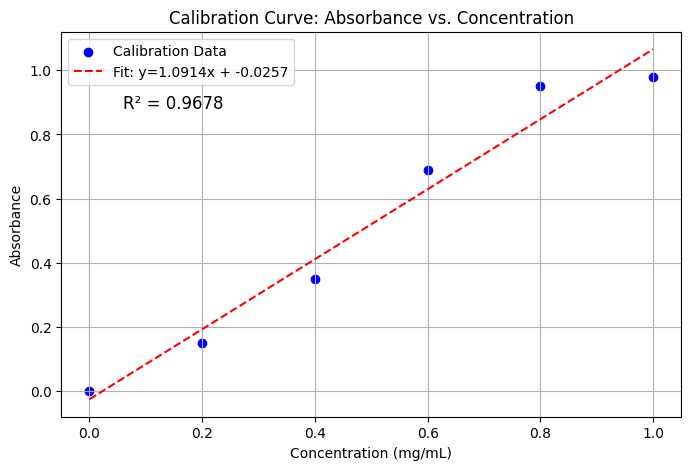

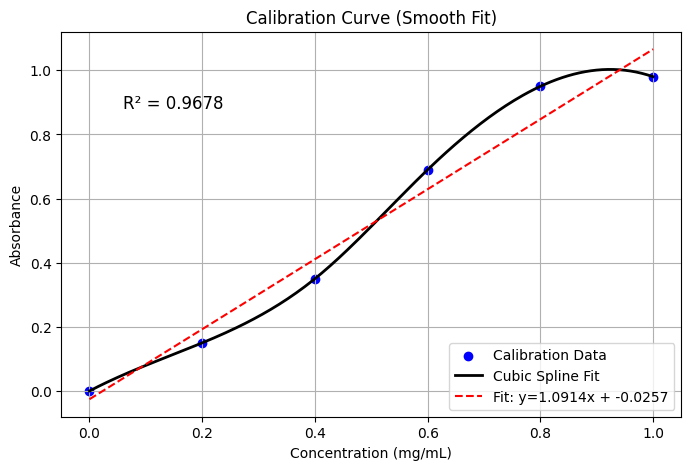

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.interpolate import make_interp_spline

# Ensure the /img directory exists
folder = "img/"
os.makedirs(folder, exist_ok=True)

# Calibration Curve Data (Potassium Dichromate - K2Cr2O7)
calibration_data = {
    "Absorbance": [0, 0.15, 0.35, 0.69, 0.95, 0.98],  # Absorbance Values
    "Concentration (mg/mL)": [0, 0.2, 0.4, 0.6, 0.8, 1]  # Concentration Values
}

# Convert to DataFrame
calib_df = pd.DataFrame(calibration_data)

# Perform Linear Regression (y = mx + b)
slope, intercept, r_value, _, _ = linregress(calib_df["Concentration (mg/mL)"], calib_df["Absorbance"])

# Print Calibration Equation
print(f"Calibration Curve Equation: Absorbance = ({slope:.4f} * Concentration) + {intercept:.4f}")

# Coefficient of determination
# Shows how well the linear model fits the data.
# R=1 → Perfect positive correlation (ideal case, straight-line fit).
# R=−1 → Perfect negative correlation (not applicable here).
# R=0 → No correlation (random relationship).

print(f"R-squared: {r_value**2:.4f}")

# Define x and y values
x = np.array(calib_df["Concentration (mg/mL)"])
y = np.array(calib_df["Absorbance"])

# Generate Smooth Curve (Cubic Spline)
x_smooth = np.linspace(x.min(), x.max(), 200)  # More points for smooth curve
spline = make_interp_spline(x, y, k=3)  # k=3 for cubic spline
y_smooth = spline(x_smooth)

# --- Plot 1: Scatter + Linear Fit ---
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label="Calibration Data")

# Add R-squared value to the graph
r_squared = r_value ** 2
plt.text(0.1, 0.8, f"R² = {r_squared:.4f}", fontsize=12, color="black", transform=plt.gca().transAxes)

plt.plot(x, slope * x + intercept, color='red', linestyle='--', label=f"Fit: y={slope:.4f}x + {intercept:.4f}")
plt.xlabel("Concentration (mg/mL)")
plt.ylabel("Absorbance")
plt.title("Calibration Curve: Absorbance vs. Concentration")
plt.legend()
plt.grid()
plt.savefig(f"{folder}/calibration_linear (K2Cr2O7).png", dpi=300, bbox_inches="tight")  # Save Image
plt.show()

# --- Plot 2: Scatter + Smooth Curve ---
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label="Calibration Data")

# Add R-squared value to the graph
r_squared = r_value ** 2
plt.text(0.1, 0.8, f"R² = {r_squared:.4f}", fontsize=12, color="black", transform=plt.gca().transAxes)


plt.plot(x_smooth, y_smooth, color='black', linestyle='-', linewidth=2, label="Cubic Spline Fit")
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label=f"Fit: y={slope:.4f}x + {intercept:.4f}")
plt.xlabel("Concentration (mg/mL)")
plt.ylabel("Absorbance")
plt.title("Calibration Curve ()")
plt.legend()
plt.grid()
plt.savefig(f"{folder}/calibration_smooth (K2Cr2O7).png", dpi=300, bbox_inches="tight")  # Save Image
plt.show()



In [3]:
# import pandas as pd
# df = pd.read_csv('dd.csv', sep=',')

# data_dict = df.to_dict(orient="list")
# data_dict

In [4]:

# Cell growth 
#Experimental Data (time, absorbance, pH, temp)
experimental_data = {
    'Time (hrs)': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0],  # Time values
    'Absorbance': [0.29, 0.32, 0.47, 0.60, 0.70, 0.74, 0.76, 0.77, 0.77, 0.70, 0.57, 0.54, 0.42]  # Absorbance values
}



cell_growth_df = pd.DataFrame(experimental_data)


# Convert Absorbance to Cell Growth Concentration using Calibration curve 
# cell_growth_df["Cell Growth Concentration (mg/mL)"] = (cell_growth_df["Absorbance"] * slope) + intercept

# Calculate Cell Growth Concentration from Absorbance using the Calibration curve 
cell_growth_df["Cell Growth Concentration (mg/mL)"] = (cell_growth_df["Absorbance"] - intercept) / slope

# Explanation:
# - "Absorbance" is the measured absorbance value from your experiment.
# - "intercept" (c) is subtracted to adjust for the offset in the calibration equation.
# - The result is divided by "slope" (m) to correctly compute the concentration.


# Initialize the first value as NaN since we can't compute µ at time 0
mu_values = [0]

for i in range(1, len(cell_growth_df)):
    X0 = cell_growth_df["Cell Growth Concentration (mg/mL)"].iloc[i-1]  # Previous time concentration
    Xt = cell_growth_df["Cell Growth Concentration (mg/mL)"].iloc[i]  # Current time concentration
    t = cell_growth_df["Time (hrs)"].iloc[i] - cell_growth_df["Time (hrs)"].iloc[i-1]  # Time interval

    mu = (np.log(Xt / X0)) / t  # Specific growth rate calculation
    mu_values.append(mu)

# Add the computed growth rates to the DataFrame
cell_growth_df["Specific Growth Rate (µ)"] = mu_values


# Save DataFrame to CSV for easy identification
cell_growth_df.to_csv("cell_growth_data.csv", index=False)
print("Data saved successfully!")

# Display the updated DataFrame
cell_growth_df.head(2)


Data saved successfully!


,Time (hrs),Absorbance,Cell Growth Concentration (mg/mL),Specific Growth Rate (µ)
0,0.0,0.29,0.289267,0.00000
1,0.5,0.32,0.316754,0.18155


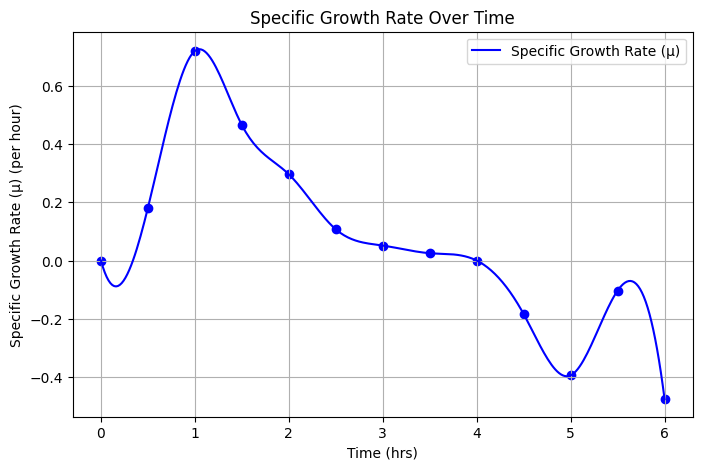

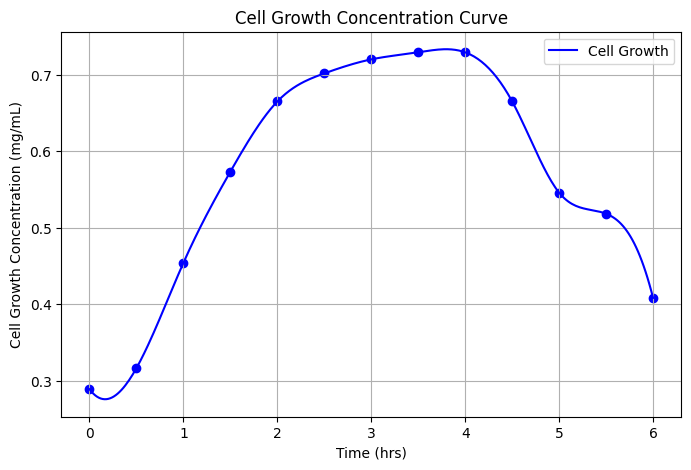

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline  # For smooth curves

# Ensure /img folder exists
folder = "img"
os.makedirs(folder, exist_ok=True)

# --- Specific Growth Rate Plot ---
plt.figure(figsize=(8, 5))

# Smooth curve
x_smooth = np.linspace(min(cell_growth_df["Time (hrs)"]), max(cell_growth_df["Time (hrs)"]), 300)
y_smooth = make_interp_spline(cell_growth_df["Time (hrs)"], cell_growth_df["Specific Growth Rate (µ)"])(x_smooth)

plt.plot(x_smooth, y_smooth, linestyle='-', color='b', label="Specific Growth Rate (µ)")
plt.scatter(cell_growth_df["Time (hrs)"], cell_growth_df["Specific Growth Rate (µ)"], color='b')  # Original points
plt.xlabel("Time (hrs)")
plt.ylabel("Specific Growth Rate (µ) (per hour)")
plt.title("Specific Growth Rate Over Time")
plt.legend()
plt.grid(True)
plt.savefig(f"{folder}/specific_growth_rate_curve.png", dpi=300, bbox_inches="tight")
plt.show()

# --- Cell Growth Concentration Curve ---
plt.figure(figsize=(8, 5))

# Smooth curve
x_smooth = np.linspace(min(cell_growth_df["Time (hrs)"]), max(cell_growth_df["Time (hrs)"]), 300)
y_smooth = make_interp_spline(cell_growth_df["Time (hrs)"], cell_growth_df["Cell Growth Concentration (mg/mL)"])(x_smooth)

plt.plot(x_smooth, y_smooth, linestyle='-', color='b', label="Cell Growth")
plt.scatter(cell_growth_df["Time (hrs)"], cell_growth_df["Cell Growth Concentration (mg/mL)"], color='b')  # Original points
plt.xlabel("Time (hrs)")
plt.ylabel("Cell Growth Concentration (mg/mL)")
plt.title("Cell Growth Concentration Curve")
plt.legend()
plt.grid(True)
plt.savefig(f"{folder}/cell_growth_curve.png", dpi=300, bbox_inches="tight")
plt.show()


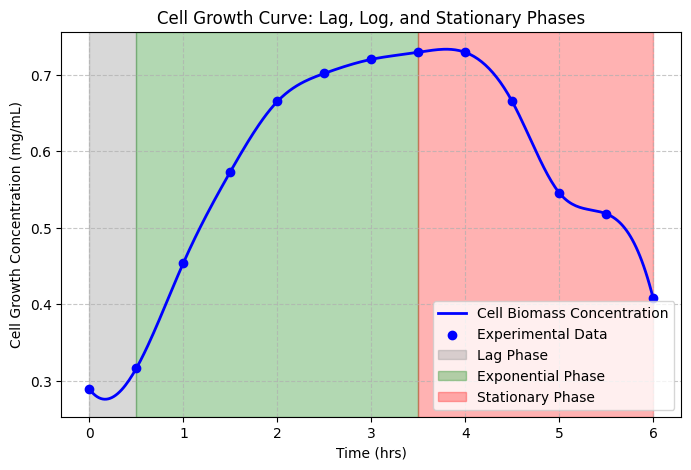

Lag Phase ends around: 0.50 hrs
Stationary Phase starts around: 3.50 hrs
Plot saved as: img/cell_growth_curve (phases).png


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import os

# Ensure the folder exists
save_folder = "img"
os.makedirs(save_folder, exist_ok=True)

# Load experimental data
time = cell_growth_df["Time (hrs)"]
cell_concentration = cell_growth_df["Cell Growth Concentration (mg/mL)"]

# Smooth the curve using spline interpolation
time_smooth = np.linspace(time.min(), time.max(), 300)  # Create more points for smooth curve
spline = make_interp_spline(time, cell_concentration, k=3)  # k=3 for cubic smoothing
cell_concentration_smooth = spline(time_smooth)

# Identify Growth Phases
lag_phase_end = time[cell_concentration.diff().idxmax()] * 0.5  # Approximate Lag phase end
stationary_phase_start = time[cell_concentration.idxmax()]  # Start of stationary phase

# Plot Smoothed Cell Growth Curve
plt.figure(figsize=(8, 5))
plt.plot(time_smooth, cell_concentration_smooth, '-', label="Cell Biomass Concentration", color="b", linewidth=2)
plt.scatter(time, cell_concentration, color='blue', zorder=3, label="Experimental Data")  # Keep original points visible

# Highlight Phases
plt.axvspan(0, lag_phase_end, color='gray', alpha=0.3, label="Lag Phase")
plt.axvspan(lag_phase_end, stationary_phase_start, color='green', alpha=0.3, label="Exponential Phase")
plt.axvspan(stationary_phase_start, time.iloc[-1], color='red', alpha=0.3, label="Stationary Phase")

# Labels & Aesthetics
plt.xlabel("Time (hrs)")
plt.ylabel("Cell Growth Concentration (mg/mL)")
plt.title("Cell Growth Curve: Lag, Log, and Stationary Phases")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Save the figure
save_path = f"{folder}/cell_growth_curve (phases).png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Show plot
plt.show()

# Print Estimated Phase Boundaries
print(f"Lag Phase ends around: {lag_phase_end:.2f} hrs")
print(f"Stationary Phase starts around: {stationary_phase_start:.2f} hrs")
print(f"Plot saved as: {save_path}")


In [7]:
# import matplotlib.pyplot as plt

# # Load experimental data
# time = cell_growth_df["Time (hrs)"]
# pH = cell_growth_df["pH"]
# temperature = cell_growth_df["Temperature (℃)"]

# # Create stacked subplots
# plt.figure(figsize=(8, 8))

# # Super title for the entire figure
# plt.suptitle("pH and Temperature Variations During Cell Growth", fontsize=14, fontweight='bold')

# # Plot pH vs Time
# plt.subplot(2, 1, 1)  # (rows, columns, index)
# plt.plot(time, pH, 'o-', color="b", label="pH")
# plt.xlabel("Time (hrs)")
# plt.ylabel("pH")
# plt.title("pH vs Time")
# plt.grid()
# plt.legend()

# # Plot Temperature vs Time
# plt.subplot(2, 1, 2)
# plt.plot(time, temperature, 'o-', color="r", label="Temperature (℃)")
# plt.xlabel("Time (hrs)")
# plt.ylabel("Temperature (℃)")
# plt.title("Temperature vs Time")
# plt.grid()
# plt.legend()

# # Adjust layout and show the plots
# plt.tight_layout()
# plt.show()



Carrying Capacity (K): 0.6323 mg/mL
Initial Cell Growth Concentration (N0): 0.2293 mg/mL
Growth Rate (r): 1.8194 per hour
Parameter Uncertainties:
  - K: ±0.0399
  - N0: ±0.0940
  - r: ±1.0109
Logistic Growth Model Equation: X(t) = 0.6323 / (1 + ((0.6323 - 0.2293) / 0.2293) * exp(-1.8194 * t))


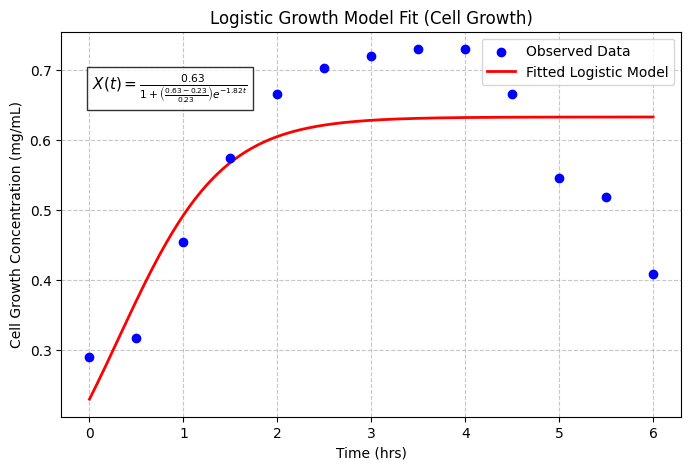

Plot saved as: img/logistic_growth_fit.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

# Define the logistic growth model function
def logistic_growth(t, K, N0, r):
    """
    Logistic Growth Model Equation:
    - K  = Carrying capacity (maximum population the environment can support)
    - N0 = Initial population size (cell concentration at t=0)
    - r  = Growth rate (rate at which the population increases)
    
    Equation: 
        N(t) = K / (1 + ((K - N0) / N0) * exp(-r * t))
    
    This describes the typical S-shaped (sigmoidal) growth pattern of microbial cells.
    """
    return K / (1 + ((K - N0) / N0) * np.exp(-r * t))

# Extract experimental data (time & cell growth concentration)
time = cell_growth_df['Time (hrs)'].values
cell_growth = cell_growth_df['Cell Growth Concentration (mg/mL)'].values

# Provide initial guesses for model fitting to help curve_fit converge
K_guess = max(cell_growth) * 1.1  # Guess K slightly above max observed value
N0_guess = cell_growth[0]  # Assume initial population is the first measurement
r_guess = 0.5  # Typical growth rate guess

# Fit the logistic model to the experimental data using curve_fit
params, covariance = curve_fit(logistic_growth, time, cell_growth, p0=[K_guess, N0_guess, r_guess])

# Extract the best-fit parameters from curve fitting
K, N0, r = params  # Optimized values of K, N0, and r
print(f"Carrying Capacity (K): {K:.4f} mg/mL")
print(f"Initial Cell Growth Concentration (N0): {N0:.4f} mg/mL")
print(f"Growth Rate (r): {r:.4f} per hour")

# Optional: Calculate standard errors (uncertainties) of the estimated parameters
param_errors = np.sqrt(np.diag(covariance))  # Extract diagonal elements (variance)
K_err, N0_err, r_err = param_errors  # Standard deviation of K, N0, and r
print(f"Parameter Uncertainties:")
print(f"  - K: ±{K_err:.4f}")
print(f"  - N0: ±{N0_err:.4f}")
print(f"  - r: ±{r_err:.4f}")

# ============================
# 📌 Logistic Growth Model
# ============================
# The Logistic Growth model describes microbial cell growth with a 
# carrying capacity (K) and follows a sigmoidal growth pattern.
# It is given by:
#
#     X(t) = K / (1 + ((K - N0) / N0) * exp(-r * t))
#
# Where:
# - X(t) = Biomass Concentration at time t (mg/mL)
# - K    = Carrying Capacity (max biomass concentration)
# - N0   = Initial Biomass Concentration
# - r    = Growth Rate Constant (per hr)
# - t    = Time (hrs)
#
# After fitting, the model equation is:

print(f"Logistic Growth Model Equation: X(t) = {K:.4f} / (1 + (({K:.4f} - {N0:.4f}) / {N0:.4f}) * exp(-{r:.4f} * t))")

# Generate smooth time points for plotting the fitted curve
time_fine = np.linspace(time.min(), time.max(), 300)  # Creates 300 points between min & max time
predicted_growth = logistic_growth(time_fine, K, N0, r)  # Compute predicted values using the fitted model

# Plot observed data and the fitted logistic growth model
plt.figure(figsize=(8, 5))
plt.scatter(time, cell_growth, label='Observed Data', color='blue', zorder=3, marker='o')  # Experimental data points
plt.plot(time_fine, predicted_growth, label='Fitted Logistic Model', color='red', linewidth=2)  # Model curve
plt.xlabel('Time (hrs)')
plt.ylabel('Cell Growth Concentration (mg/mL)')
plt.title('Logistic Growth Model Fit (Cell Growth)')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)  # Add grid for better readability

# 📌 Add equation annotation inside the plot
equation_text = (
    f"$X(t) = \\frac{{{K:.2f}}}{{1 + \\left( \\frac{{{K:.2f} - {N0:.2f}}}{{{N0:.2f}}} \\right) e^{{-{r:.2f}t}}}}$"
)

plt.annotate(
    equation_text,
    xy=(0.05, 0.85),  # Position inside the graph
    xycoords="axes fraction",
    fontsize=11,
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="black")
)

# Save the figure in the 'img' folder
folder = "img"
os.makedirs(folder, exist_ok=True)  # Ensure the folder exists
save_path = f"{folder}/logistic_growth_fit.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")  # Save with high resolution
plt.show()  # Display the plot

# Print the file path where the plot is saved
# print(f"Plot saved as: {save_path}")


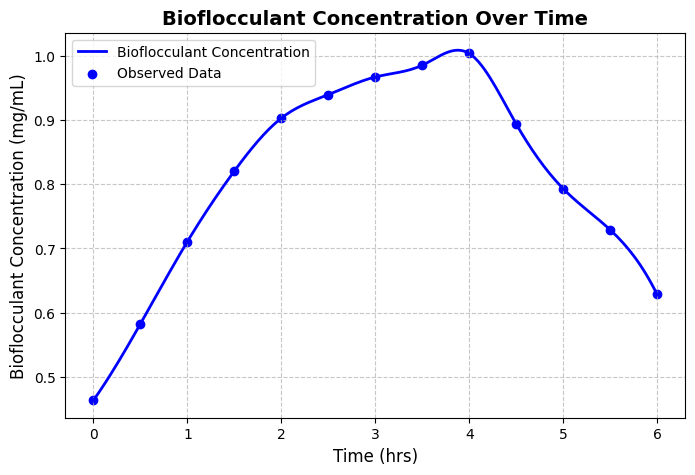

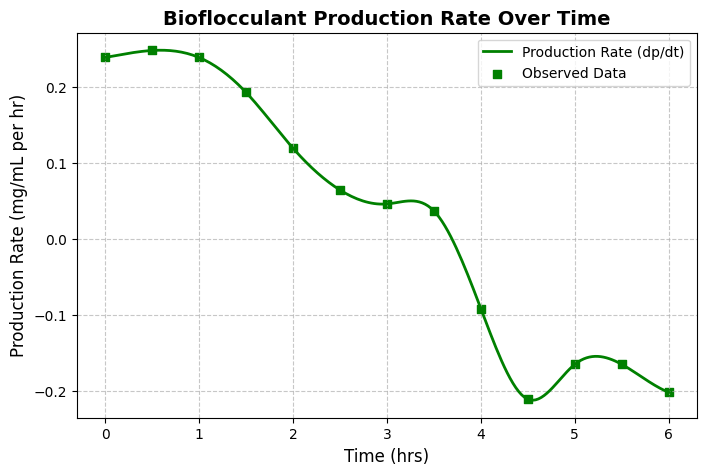

Data and plots saved successfully!


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline  # For smooth curves

# Bioflocculant Production - Experimental Data
bioflocculant_data = {
    "Time (hrs)": [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0],
    "Absorbance": [0.48, 0.61, 0.75, 0.87, 0.96, 1.00, 1.03, 1.05, 1.07, 0.95, 0.84, 0.77, 0.66]
}

# Convert to DataFrame
bioflocculant_df = pd.DataFrame(bioflocculant_data)

# Convert Absorbance to Bioflocculant Concentration using Calibration Curve
bioflocculant_df["Bioflocculant Concentration (mg/mL)"] = (bioflocculant_df["Absorbance"] - intercept) / slope

# Compute Production Rate (dp/dt) using Finite Differences
bioflocculant_df["Production Rate (mg/mL per hr)"] = np.gradient(
    bioflocculant_df["Bioflocculant Concentration (mg/mL)"], bioflocculant_df["Time (hrs)"]
)

# Generate Smooth Time Points for Interpolation
smooth_time = np.linspace(bioflocculant_df["Time (hrs)"].min(), bioflocculant_df["Time (hrs)"].max(), 200)

# Interpolate for smooth curves
spline_concentration = make_interp_spline(bioflocculant_df["Time (hrs)"], bioflocculant_df["Bioflocculant Concentration (mg/mL)"])
smooth_concentration = spline_concentration(smooth_time)

spline_production_rate = make_interp_spline(bioflocculant_df["Time (hrs)"], bioflocculant_df["Production Rate (mg/mL per hr)"])
smooth_production_rate = spline_production_rate(smooth_time)

# Plot Bioflocculant Concentration Over Time (Smooth)
plt.figure(figsize=(8, 5))
plt.plot(
    smooth_time, smooth_concentration, color='b', linewidth=2, label="Bioflocculant Concentration"
)
plt.scatter(bioflocculant_df["Time (hrs)"], bioflocculant_df["Bioflocculant Concentration (mg/mL)"], color='b', marker='o', label="Observed Data")
plt.xlabel("Time (hrs)", fontsize=12)
plt.ylabel("Bioflocculant Concentration (mg/mL)", fontsize=12)
plt.title("Bioflocculant Concentration Over Time", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.savefig(f"{folder}/bioflocculant_concentration_curve.png", dpi=300)
plt.show()

# Plot Bioflocculant Production Rate Over Time (Smooth)
plt.figure(figsize=(8, 5))
plt.plot(
    smooth_time, smooth_production_rate, color='green', linewidth=2, label="Production Rate (dp/dt)"
)
plt.scatter(bioflocculant_df["Time (hrs)"], bioflocculant_df["Production Rate (mg/mL per hr)"], color='green', marker='s', label="Observed Data")
plt.xlabel("Time (hrs)", fontsize=12)
plt.ylabel("Production Rate (mg/mL per hr)", fontsize=12)
plt.title("Bioflocculant Production Rate Over Time", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.savefig(f"{folder}/bioflocculant_production_rate.png", dpi=300)
plt.show()

# Save DataFrame to CSV
bioflocculant_df.to_csv("bioflocculant_production_data.csv", index=False)
print("Data and plots saved successfully!")


In [10]:
# import matplotlib.pyplot as plt

# # Load experimental data
# time = bioflocculant_df["Time (hrs)"]
# pH = bioflocculant_df["pH"]
# temperature = bioflocculant_df["Temperature (℃)"]

# # Create stacked subplots
# plt.figure(figsize=(8, 8))

# # Super title for the entire figure
# plt.suptitle("pH and Temperature Variations During Bioflocculant Production", fontsize=14, fontweight='bold')

# # Plot pH vs Time
# plt.subplot(2, 1, 1)  # (rows, columns, index)
# plt.plot(time, pH, 'o-', color="b", label="pH")
# plt.xlabel("Time (hrs)")
# plt.ylabel("pH")
# plt.title("pH vs Time")
# plt.grid()
# plt.legend()

# # Plot Temperature vs Time
# plt.subplot(2, 1, 2)
# plt.plot(time, temperature, 'o-', color="r", label="Temperature (℃)")
# plt.xlabel("Time (hrs)")
# plt.ylabel("Temperature (℃)")
# plt.title("Temperature vs Time")
# plt.grid()
# plt.legend()

# # Adjust layout and show the plots
# plt.tight_layout()
# plt.show()



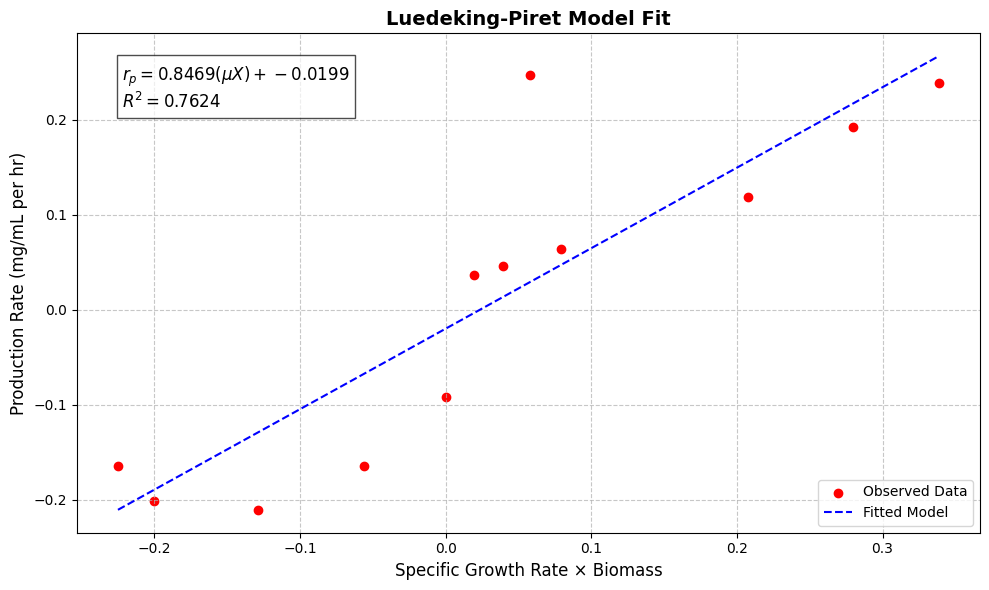

Estimated α (Growth-Associated Term): 0.8469
Estimated β (Non-Growth-Associated Term): -0.0199
R-squared value: 0.7624
Luedeking-Piret Model Equation: rp = 0.8469 * (μX) + -0.0199


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline  # For smooth curve
from scipy.stats import linregress


# Extract absorbance related to cell growth (OD600)
absorbance = cell_growth_df["Absorbance"].iloc[1:].values  # Ignore the first time point

# Compute (μ × Biomass)
mu_X_values = mu_values[1:] * absorbance  # Element-wise multiplication

# Extract production rate from bioflocculant data
production_rate = bioflocculant_df["Production Rate (mg/mL per hr)"].iloc[1:].values

# Fit Linear Model (Luedeking-Piret Equation: rp = α (μX) + β)
slope, intercept, r_value, _, _ = linregress(mu_X_values, production_rate)

# Predictions for plotting (linear model)
mu_X_pred = np.linspace(min(mu_X_values), max(mu_X_values), 100)
production_rate_pred = slope * mu_X_pred + intercept  # Linear equation

plt.figure(figsize=(10, 6))

# Plot Luedeking-Piret Model Fit
plt.scatter(mu_X_values, production_rate, label="Observed Data", color='r')
plt.plot(mu_X_pred, production_rate_pred, label="Fitted Model", linestyle="--", color="b")
plt.xlabel("Specific Growth Rate × Biomass", fontsize=12)
plt.ylabel("Production Rate (mg/mL per hr)", fontsize=12)
plt.title("Luedeking-Piret Model Fit", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# 📌 Equation Annotation (Non-Distracting)
equation_text = (
    f"$r_p = {slope:.4f} (\\mu X) + {intercept:.4f}$\n"
    f"$R^2 = {r_value**2:.4f}$"
)

plt.annotate(
    equation_text,
    xy=(0.05, 0.85),  # Adjust position (relative to axes)
    xycoords="axes fraction",
    fontsize=12, color="black",
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')
)

# Save the plot (unchanged)
plt.savefig(f"{folder}/luedeking_piret_model.png", dpi=300)

plt.tight_layout()
plt.show()

# ============================
# 📌 Luedeking-Piret Model
# ============================
# The Luedeking-Piret equation describes the bio-product formation rate (r_p)
# as a function of the specific growth rate (μ) and biomass concentration (X).
# It is a linear model given by:
#
#     r_p = α (μX) + β
#
# Where:
# - r_p = Production Rate (mg/mL per hr)
# - μ   = Specific Growth Rate (per hr)
# - X   = Biomass Concentration (mg/mL)
# - α   = Growth-associated term (fitted slope)
# - β   = Non-growth-associated term (fitted intercept)
#
# After fitting, the model equation is:

# Display estimated parameters
print(f"Estimated α (Growth-Associated Term): {slope:.4f}")
print(f"Estimated β (Non-Growth-Associated Term): {intercept:.4f}")
print(f"R-squared value: {r_value**2:.4f}")

print(f"Luedeking-Piret Model Equation: rp = {slope:.4f} * (μX) + {intercept:.4f}")


Calibration Curve Equation: Absorbance = (0.9371 * Concentration) + -0.1152
R-squared: 0.9095


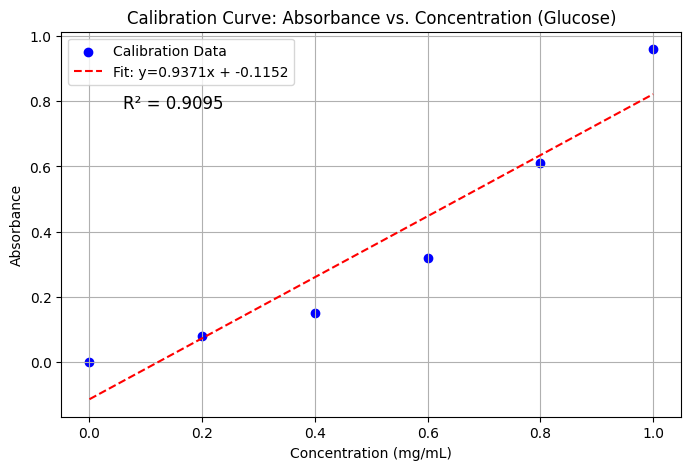

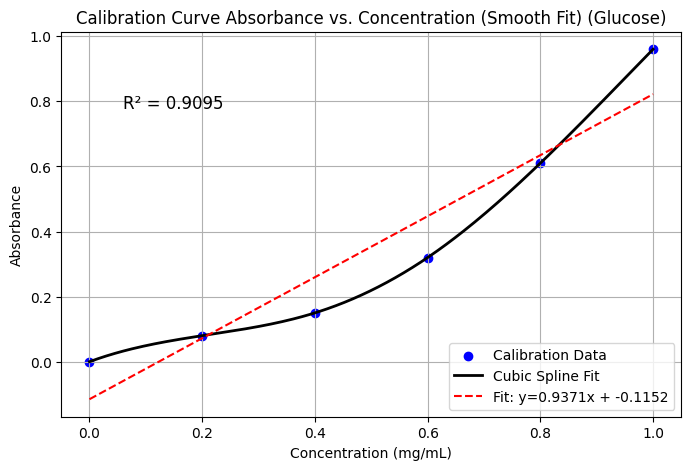

In [ ]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.interpolate import make_interp_spline

# Calibration Curve Data (Glucose)
calibration_data = {
    "Absorbance": [0,0.08,0.15,0.32,0.61,0.96],  # Absorbance Values
    "Concentration (mg/mL)": [0 ,0.2 ,0.4 ,0.6 ,0.8,1]  # Concentration Values
}

# Convert to DataFrame
sub_calib_df = pd.DataFrame(calibration_data)

# Perform Linear Regression (y = mx + b)
slope, intercept, r_value, _, _ = linregress(sub_calib_df["Concentration (mg/mL)"], sub_calib_df["Absorbance"])

# Print Calibration Equation
print(f"Calibration Curve Equation: Absorbance = ({slope:.4f} * Concentration) + {intercept:.4f}")

# Coefficient of determination
# Shows how well the linear model fits the data.
# R=1 → Perfect positive correlation (ideal case, straight-line fit).
# R=−1 → Perfect negative correlation (not applicable here).
# R=0 → No correlation (random relationship).

print(f"R-squared: {r_value**2:.4f}")

# Define x and y values
x = np.array(sub_calib_df["Concentration (mg/mL)"])
y = np.array(sub_calib_df["Absorbance"])

# Generate Smooth Curve (Cubic Spline)
x_smooth = np.linspace(x.min(), x.max(), 200)  # More points for smooth curve
spline = make_interp_spline(x, y, k=3)  # k=3 for cubic spline
y_smooth = spline(x_smooth)

# --- Plot 1: Scatter + Linear Fit ---
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label="Calibration Data")

# Add R-squared value to the graph
r_squared = r_value ** 2
plt.text(0.1, 0.8, f"R² = {r_squared:.4f}", fontsize=12, color="black", transform=plt.gca().transAxes)

plt.plot(x, slope * x + intercept, color='red', linestyle='--', label=f"Fit: y={slope:.4f}x + {intercept:.4f}")
plt.xlabel("Concentration (mg/mL)")
plt.ylabel("Absorbance")
plt.title("Calibration Curve: Absorbance vs. Concentration (Glucose)")
plt.legend()
plt.grid()
plt.savefig(f"{folder}/calibration_linear (Glucose).png", dpi=300, bbox_inches="tight")  # Save Image
plt.show()

# --- Plot 2: Scatter + Smooth Curve ---
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label="Calibration Data")

# Add R-squared value to the graph
r_squared = r_value ** 2
plt.text(0.1, 0.8, f"R² = {r_squared:.4f}", fontsize=12, color="black", transform=plt.gca().transAxes)


plt.plot(x_smooth, y_smooth, color='black', linestyle='-', linewidth=2, label="Cubic Spline Fit")
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label=f"Fit: y={slope:.4f}x + {intercept:.4f}")
plt.xlabel("Concentration (mg/mL)")
plt.ylabel("Absorbance")
plt.title("Calibration Curve Absorbance vs. Concentration () (Glucose)")
plt.legend()
plt.grid()
plt.savefig(f"{folder}/calibration_smooth (Glucose).png", dpi=300, bbox_inches="tight")  # Save Image
plt.show()



In [14]:
import pandas as pd
import numpy as np

# Substrate consumption 
# Experimental Data (time, absorbance, pH, temp)

experimental_data = {  
    "Time (hrs)": [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0],  
    "Absorbance": [0.62, 0.61, 0.60, 0.59, 0.57, 0.53, 0.47, 0.41, 0.36, 0.51, 0.61, 0.73, 0.86]  
}  

substrate_df = pd.DataFrame(experimental_data)


# Convert Absorbance to Substrate Consumption Concentration using Calibration curve 

substrate_df["Substrate Concentration (mg/mL)"] = (substrate_df["Absorbance"] - intercept) / slope


substrate_df['Substrate Consumption Rate (mg/mL per hr)'] = -np.gradient(substrate_df["Substrate Concentration (mg/mL)"], substrate_df["Time (hrs)"])

substrate_df.head(2)



,Time (hrs),Absorbance,Substrate Concentration (mg/mL),Substrate Consumption Rate (mg/mL per hr)
0,0.0,0.62,0.784553,0.021341
1,0.5,0.61,0.773882,0.021341


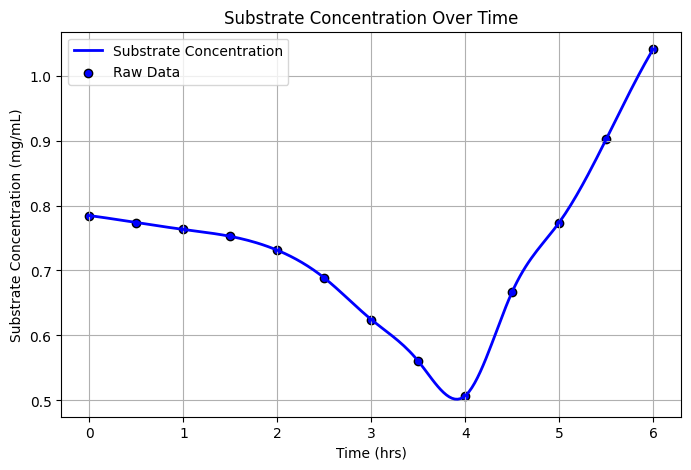

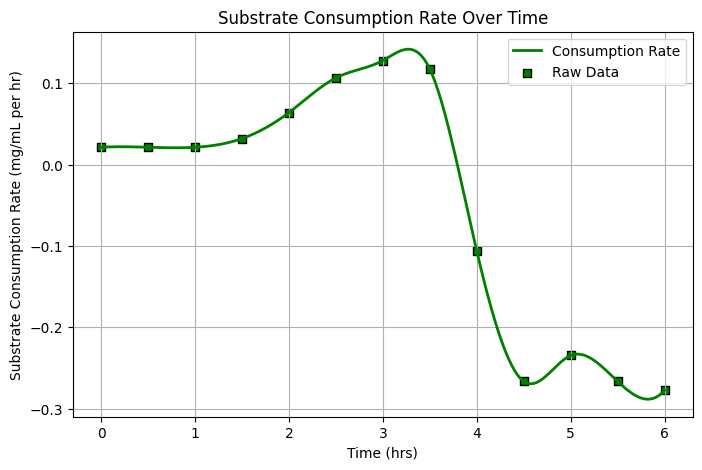

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import os

# Extract time and substrate concentration
time = substrate_df["Time (hrs)"].values
substrate_concentration = substrate_df["Substrate Concentration (mg/mL)"].values
consumption_rate = substrate_df["Substrate Consumption Rate (mg/mL per hr)"].values

# Create smooth curves using spline interpolation
time_smooth = np.linspace(time.min(), time.max(), 200)  # Generate finer time points
substrate_spline = make_interp_spline(time, substrate_concentration, k=3)  # Cubic spline
consumption_spline = make_interp_spline(time, consumption_rate, k=3)

substrate_smooth = substrate_spline(time_smooth)
consumption_smooth = consumption_spline(time_smooth)

# Plot Substrate Concentration Over Time
plt.figure(figsize=(8, 5))
plt.plot(time_smooth, substrate_smooth, label="Substrate Concentration", color="b", linewidth=2)
plt.scatter(time, substrate_concentration, marker='o', color='b', edgecolor='black', label="Data Point")
plt.xlabel("Time (hrs)")
plt.ylabel("Substrate Concentration (mg/mL)")
plt.title("Substrate Concentration Over Time")
plt.legend()
plt.grid()
plt.savefig(f"{folder}/substrate_concentration.png", dpi=300)
plt.show()

# Plot Substrate Consumption Rate Over Time
plt.figure(figsize=(8, 5))
plt.plot(time_smooth, consumption_smooth, label="Consumption Rate", color="green", linewidth=2)
plt.scatter(time, consumption_rate, marker='s', color='green', edgecolor='black', label="Data Point")
plt.xlabel("Time (hrs)")
plt.ylabel("Substrate Consumption Rate (mg/mL per hr)")
plt.title("Substrate Consumption Rate Over Time")
plt.legend()
plt.grid()
plt.savefig(f"{folder}/substrate_consumption_rate.png", dpi=300)
plt.show()


In [42]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
# import os

# # Ensure output directory exists
# output_folder = "plots"
# os.makedirs(output_folder, exist_ok=True)

# # Define Monod Growth Model
# def monod_model(S, umax, Ks):
#     """
#     Monod Equation: μ = (μmax * S) / (Ks + S)
    
#     Parameters:
#     S  = Substrate Concentration (mg/mL)
#     umax = Maximum Specific Growth Rate
#     Ks = Half-Saturation Constant
    
#     Returns:
#     Growth rate as per Monod model.
#     """
#     return (umax * S) / (Ks + S)

# # Extract Data
# time = substrate_df["Time (hrs)"].values
# substrate_concentration = substrate_df["Substrate Concentration (mg/mL)"].values

# # Fit Monod Model to Experimental Data
# popt, _ = curve_fit(monod_model, time, substrate_concentration, p0=[0.5, 1.0])  # Initial guess: umax=0.5, Ks=1.0

# # Extract Fitted Parameters
# umax, Ks = popt
# print(f"Estimated μmax (Maximum Growth Rate): {umax:.4f}")
# print(f"Estimated Ks (Half-Saturation Constant): {Ks:.4f}")

# # Generate Smooth Data for Plotting
# time_smooth = np.linspace(min(time), max(time), 200)
# substrate_smooth = monod_model(time_smooth, umax, Ks)

# # Plot Experimental Data vs. Fitted Monod Model
# plt.figure(figsize=(8, 5))
# plt.scatter(time, substrate_concentration, color='blue', edgecolor='black', label="Experimental Data")
# plt.plot(time_smooth, substrate_smooth, color='red', linestyle='--', linewidth=2, label="Monod Model Fit")
# plt.xlabel("Time (hrs)")
# plt.ylabel("Substrate Concentration (mg/mL)")
# plt.title("Monod Model Fit: Substrate Concentration vs Time")
# plt.legend()
# plt.grid()

# # Save Figure
# plot_path = f"{folder}/monod_model_fit.png"
# plt.savefig(plot_path, dpi=300)
# plt.show()

# # Save Processed Data
# substrate_df.to_csv('substrate_data.csv', index=False)


In [17]:
# import matplotlib.pyplot as plt

# # Load experimental data
# time = substrate_df["Time (hrs)"]
# pH = substrate_df["pH"]
# temperature = substrate_df["Temperature (℃)"]

# # Create stacked subplots
# plt.figure(figsize=(8, 8))

# # Super title for the entire figure
# plt.suptitle("pH and Temperature Variations During Substrate Consumption", fontsize=14, fontweight='bold')

# # Plot pH vs Time
# plt.subplot(2, 1, 1)  # (rows, columns, index)
# plt.plot(time, pH, 'o-', color="b", label="pH")
# plt.xlabel("Time (hrs)")
# plt.ylabel("pH")
# plt.title("pH vs Time")
# plt.grid()
# plt.legend()

# # Plot Temperature vs Time
# plt.subplot(2, 1, 2)
# plt.plot(time, temperature, 'o-', color="r", label="Temperature (℃)")
# plt.xlabel("Time (hrs)")
# plt.ylabel("Temperature (℃)")
# plt.title("Temperature vs Time")
# plt.grid()
# plt.legend()

# # Adjust layout and show the plots
# plt.tight_layout()
# plt.show()



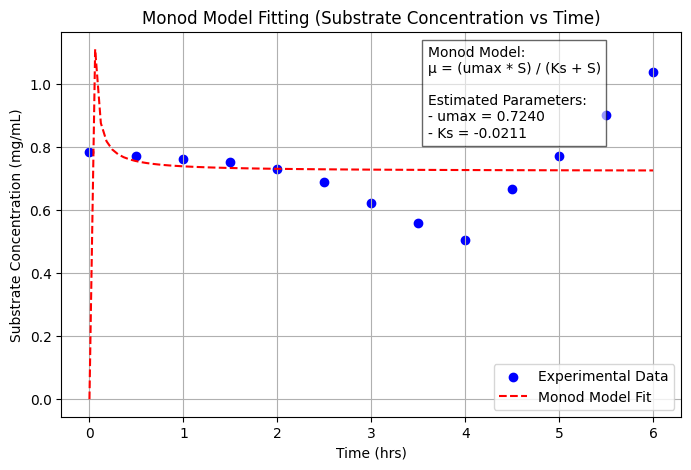

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Monod model equation
def monod_model(s, umax, Ks):
    """
    Monod Equation: μ = (μmax * s) / (Ks + s)
    
    Parameters:
    S  = Substrate Concentration (mg/mL)
    umax = Maximum Specific Growth Rate
    Ks = Half-Saturation Constant
    
    Returns:
    Growth rate as per Monod model.
    """
    return (umax * s) / (Ks + s)  

# Fit the Monod model
popt, _ = curve_fit(monod_model, substrate_df["Time (hrs)"], substrate_df["Substrate Concentration (mg/mL)"])
umax, Ks = popt  # Extract fitted parameters

# Generate smooth curve for the model
t_smooth = np.linspace(min(substrate_df["Time (hrs)"]), max(substrate_df["Time (hrs)"]), 100)
predicted_concentration = monod_model(t_smooth, umax, Ks)

# Plot Experimental Data and Monod Model Fit
plt.figure(figsize=(8, 5))
plt.scatter(substrate_df["Time (hrs)"], substrate_df["Substrate Concentration (mg/mL)"], color='blue', label="Experimental Data")
plt.plot(t_smooth, predicted_concentration, color='red', linestyle='--', label="Monod Model Fit")

# Add equation and parameters as text
equation_text = f"Monod Model:\nμ = (umax * S) / (Ks + S)\n\nEstimated Parameters:\n- umax = {umax:.4f}\n- Ks = {Ks:.4f}"
plt.text(0.6 * max(substrate_df["Time (hrs)"]), 0.8 * max(substrate_df["Substrate Concentration (mg/mL)"]), 
         equation_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

# Labels and title
plt.xlabel("Time (hrs)")
plt.ylabel("Substrate Concentration (mg/mL)")
plt.title("Monod Model Fitting (Substrate Concentration vs Time)")
plt.legend()
plt.grid()


# Save the Figure
plot_path = f"{folder}/monod_model_fit.png"
plt.savefig(plot_path, dpi=300)
plt.show()


substrate_df.to_csv('substrate_data.csv', index=False)
# Print Estimated Parameters
# print(f"Estimated Monod Model Parameters:")
# print(f" - Maximum Growth Rate (umax): {umax:.4f}")
# print(f" - Half-Saturation Constant (Ks): {Ks:.4f}")


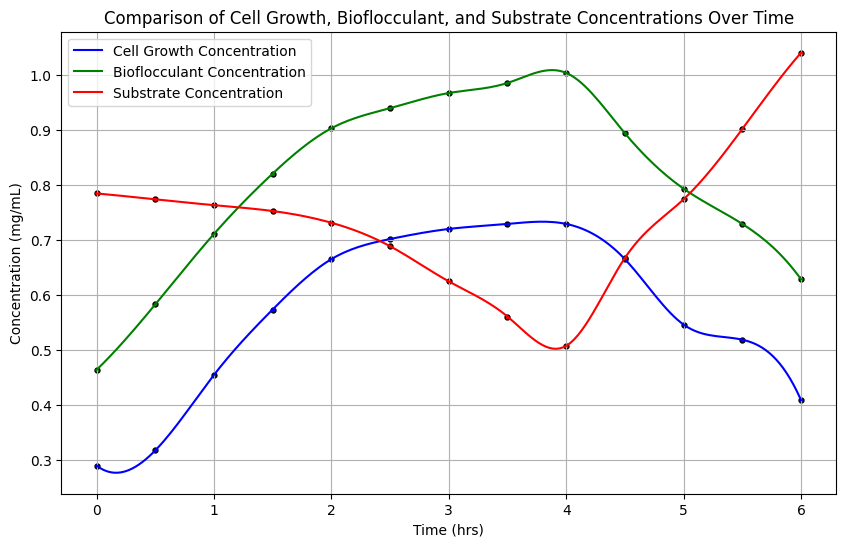

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import make_interp_spline


# Extract Time Data
time = bioflocculant_df["Time (hrs)"].values  

# Extract Concentration Data
cell_concentration = cell_growth_df["Cell Growth Concentration (mg/mL)"].values
bioflocculant_concentration = bioflocculant_df["Bioflocculant Concentration (mg/mL)"].values
substrate_concentration = substrate_df["Substrate Concentration (mg/mL)"].values

# Generate Smooth Curves Using Spline Interpolation
time_smooth = np.linspace(time.min(), time.max(), 200)

cell_smooth = make_interp_spline(time, cell_concentration, k=3)(time_smooth)
bioflocculant_smooth = make_interp_spline(time, bioflocculant_concentration, k=3)(time_smooth)
substrate_smooth = make_interp_spline(time, substrate_concentration, k=3)(time_smooth)

# Plot All Three Concentrations
plt.figure(figsize=(10, 6))

# Cell Growth Curve
plt.plot(time_smooth, cell_smooth, label="Cell Growth Concentration", linestyle='-', color='b')
plt.scatter(time, cell_concentration, color='b', marker='.', edgecolors='black', s=50)

# Bioflocculant Concentration Curve
plt.plot(time_smooth, bioflocculant_smooth, label="Bioflocculant Concentration", linestyle='-', color='g')
plt.scatter(time, bioflocculant_concentration, color='g', marker='.', edgecolors='black', s=50)

# Substrate Concentration Curve
plt.plot(time_smooth, substrate_smooth, label="Substrate Concentration", linestyle='-', color='r')
plt.scatter(time, substrate_concentration, color='r', marker='.', edgecolors='black', s=50)

# Labels and Title
plt.xlabel("Time (hrs)")
plt.ylabel("Concentration (mg/mL)")
plt.title("Comparison of Cell Growth, Bioflocculant, and Substrate Concentrations Over Time")
plt.legend()
plt.grid()

# # Save the Figure
plot_path = f"{folder}/all_concentration_plot.png"
plt.savefig(plot_path, dpi=300)
plt.show()
